![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Ecuaciones no Lineales - Segunda Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

### Búsqueda de raíces en ecuaciones no lineales
___

Problema a resolver: Hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$



### Método de las aproximaciones sucesivas o punto fijo
___
Partiendo de la formulación del problema tenemos que:
$$ f(x)=0 $$
Escribimos el problema de manera levemente diferente, incorporando una nueva función $g(x)$:
$$ f(x)=x-g(x)=0 $$

De esta manera resulta muy sencillo despejar $x$ a partir de suponer que:
$$ x=g(x)$$

Como estamos resolviendo de forma iterativa la  expresión que queda es:

$$ x_{k+1}=g(x_k)$$

Siendo un proceso iterativo, hay que partir de un valor inicial $x_0$, también llamado valor 'semilla'.

### Qué tiene que cumplir g(x):
___
- *Teorema 1.* Si $g(x)$ $\in C[a,b]$ y $g(x)$ $\in [a,b]$ para todo $x$ $\in [a,b]$, entonces $g(x)$ tiene un punto fijo en $[a; b]$.

- *Teorema 2.* Si $g'(x)$ existe en $[a, b]$, y existe una constante $m \leq 1$, tal que:
$$|g'(x)|\leq m, \; para\; toda\; x \in [a,b],$$
entonces, el punto fijo en $[a, b]$ es único.

Estos teoremas son **suficientes** pero **no necesarios**, es decir, pueden no cumplirse y existir dicho punto fijo.


### Elección de la g(x):
___
En la práctica, en general, no verificamos los teoremas antes de empezar, sino que probamos con distintas funciones, partiendo de que:

$$ f(x)= 0 $$

Si sumamos $x$ a ambos miembros:

$$ f(x)+x= x $$

Y recordando que $g(x)=x$ podemos definir una primera $g_1(x)$ como:

$$ g_1(x)= f(x)+x $$

Siguiendo el mismo procedimiento, se puede sumar a ambos miembros $x^2$, $x^3$,$x^7$ por ejemplo, podemos obtener, respectivamente, las siguientes funciones:
$$ g_2(x)= \sqrt[] {f(x)+x^2}, $$
$$ g_3(x)= \sqrt[3] {f(x)+x^3}, $$
$$ g_4(x)= \sqrt[7] {f(x)+x^7}.$$


### Principales pasos a seguir para resolver por punto fijo:
___

1. Seleccionar un valor inicial $x_0$ dentro del intervalo $[a,b]$ y una función $g(x)$. 
2. Con el valor inicial $x_0$, comenzar a iterar en la sucesión  $ x_{i+1}=g(x_i)$
3. Si el método _no converge_, probar cambiando el valor inicial. 
4. Si sigue sin converger, probar con otra función $g(x)$ y continuar iterando.
5. ¿Hasta cuándo? Tengo que definir una tolerancia y un criterio de corte (repasar presentación anterior)

In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#programo el método punto fijo
def punto_fijo(x0 , tol, itmax = 100): 
        df = pd.DataFrame(columns=('xi','gi'))
        x0 = x0 
        contador = 0  
        x1 = g(x0)
        while (contador < itmax) and (abs((x1 - x0) / x1) > tol):
            df.loc[contador] = [x0,x1]
            x0 = x1                                                 
            x1 = g(x0)                 
            contador += 1                      
        print('El método de punto fijo convergió en',contador,'iteraciones')
        return df


### Ejemplo usando punto fijo
___

Hallar $p$ tal que $f(p)=0,$ $p  \in [0,4]$ siendo :
$$f(x)=(x+e^\frac{x}{2}).cos(x)+5$$

Aplico el método punto fijo utilizando una función $ g(x)= \sqrt[3] {f(x)+x^3}$, y un valor inicial $x_0$=0.

In [2]:
#defino el valor inicial y la tolerancia
X0=0 
tolerancia=10**(-15)

def f(x):#definimos la función con la que vamos a trabajar
    return (x+np.e**(x/2))*np.cos(x)+5   #deben cambiar la función si quieren probar otra 

def g(x):#definimos la función g 
    return (x**3+f(x))**(1/3)   # deben cambiar la función si quieren probar otra 

ejemplo=punto_fijo(X0, tolerancia)


El método de punto fijo convergió en 90 iteraciones


In [3]:
from IPython.display import display, Math
import sympy.printing as printing

xcero = ejemplo.xi
xuno = ejemplo.gi

print ("Analicemos las primeras iteraciones. \n")  

for p in range (10):
    print ("Iteración "+str(p)+": ")
    ec = "x_"+str(p)+"= "+str(xcero[p])+"\;y\; g(x_"+str(p)+")= "+str(xuno[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos las primeras iteraciones. 

Iteración 0: 


<IPython.core.display.Math object>

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


<IPython.core.display.Math object>

Iteración 3: 


<IPython.core.display.Math object>

Iteración 4: 


<IPython.core.display.Math object>

Iteración 5: 


<IPython.core.display.Math object>

Iteración 6: 


<IPython.core.display.Math object>

Iteración 7: 


<IPython.core.display.Math object>

Iteración 8: 


<IPython.core.display.Math object>

Iteración 9: 


<IPython.core.display.Math object>

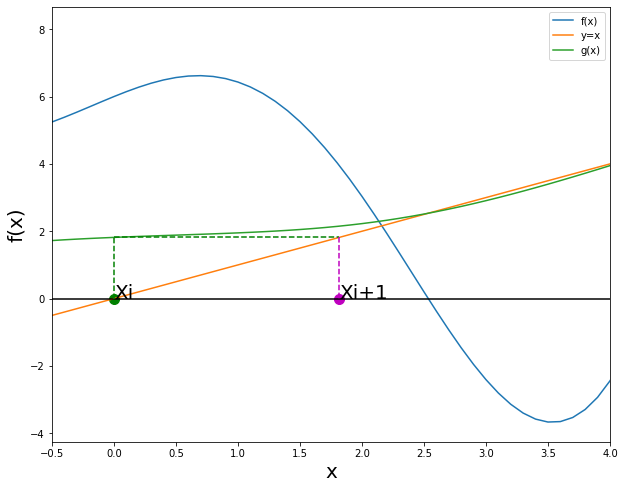

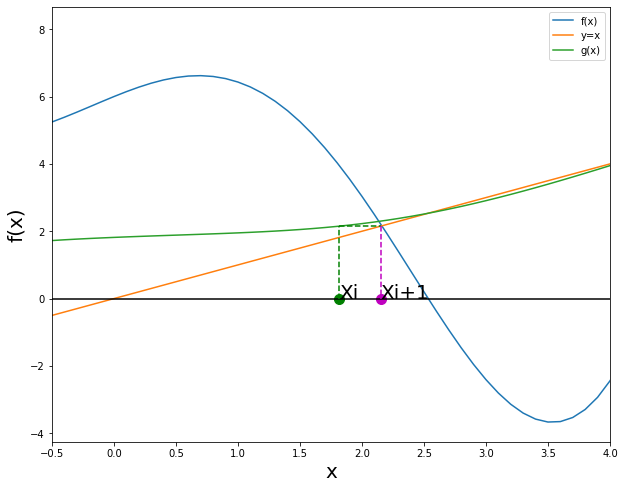

In [4]:
import matplotlib.pyplot as plt
ejex = np.arange(-1, 5, 0.1);
y = f(ejex)

def i(x):#definimos la función =x
    return x

for p in range (2):
    fig = plt.figure(figsize=(10,8))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=20)
    plt.xlim(-0.5,4)
    plt.ylabel('f(x)',fontsize=20)
    plt.plot(ejex, i(ejex))
    plt.plot(ejex, g(ejex))
    plt.axhline(y=0, color='k')   
    plt.scatter(x=xcero[p], y=0, marker="o", c='green', s=100)
    plt.annotate("Xi", (xcero[p], 0),fontsize=20)
    plt.plot([xcero[p],xcero[p]], [0,xuno[p]], color='g',linestyle='dashed')
    plt.plot([xcero[p],xuno[p]], [xuno[p],xuno[p]], color='g',linestyle='dashed')
    plt.scatter(x=xuno[p], y=0, marker="o", c='m', s=100)
    plt.annotate("Xi+1", (xuno[p], 0),fontsize=20)
    plt.legend(['f(x)','y=x','g(x)'],fontsize=10)
    plt.plot([xuno[p],xuno[p]], [xuno[p],0], color='m',linestyle='dashed')
    
    #plt.axvline(x=x[p], color='g',linestyle='dashed') 
    #plt.axvline(x=a[p], color='m') 
    #plt.axvline(x=b[p], color='m'); 

In [5]:
print('Resumen de resultados para punto fijo:')
print('A continuación se muestran las primeras iteraciones:')
ejemplo.head(10)

Resumen de resultados para punto fijo:
A continuación se muestran las primeras iteraciones:


,xi,gi
0,0.000000,1.817121
1,1.817121,2.150982
2,2.150982,2.299932
3,2.299932,2.382844
4,2.382844,2.433535
5,2.433535,2.466121
6,2.466121,2.487705
7,2.487705,2.502273
8,2.502273,2.512227
9,2.512227,2.519086


### Ejercicio adicional:
___

Hallar $p$ tal que $f(p)=0,$ $p  \in [0,4]$ siendo :
$$f(x)=(x+e^\frac{x}{2}).cos(x)+5$$

Resolver el ejercicio aplicando nuevamente el método de punto fijo, pero ahora para las funciones:

$$ g_1(x)= f(x)+x\ $$
$$ g_2(x)= \sqrt[3] {f(x)+x^3} $$

En cada caso, probar con tres valores de valor inicial $x_0$: 0, 2 y 4.

¿Qué conclusiones podemos sacar sobre este método?




![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)



# GRACIAS POR SU ATENCIÓN



### Ecuaciones no Lineales - Segunda Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*